In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import utils

### Load Data

In [2]:
multipleLR = np.loadtxt('Datasets/MultipleLR.csv',delimiter = ',')
x_points1 = multipleLR[:,0] 
x_points2 = multipleLR[:,1] 
x_points3 = multipleLR[:,2] 
y_points0 = multipleLR[:,3]

In [3]:
X1 = multipleLR[:,:3]
X2 = multipleLR[:,:2]
X3=multipleLR[:,:1]

In [4]:
x_points= np.linspace(0,20)
x_points=x_points.reshape(-1,1)
y_points= -2*x_points + 1
Data = np.hstack((x_points, y_points))
x0 = Data[:,:1]
y0=Data[:,1]

### Data Plotting Methods

In [5]:
def drawScatter(x,y,xlabel,ylabel,title):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [6]:
def drawScatter2(x,y,xlabel,ylabel,title):
    plt.plot(x,y,'-o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [7]:
def drawRegressionLine(x,y,xlabel,ylabel,title,theta0,theta1):
    drawScatter(x,y,xlabel,ylabel,title)
    plt.plot(x, theta0 + theta1*x_points ,color='red')

### Code

In [8]:
def multiLRNminibatchAdam(X,y,batchSize,epochs,alpha,eps,beta1,beta2,threshold):
    print(X.shape)
    thetas,m,v=np.array(np.zeros(X.shape[1]+1)),np.array(np.zeros(X.shape[1]+1)),np.array(np.zeros(X.shape[1]+1))
    thetaList , costs,hs,hbatch,vs,ms  = np.empty((1,X.shape[1]+1)),[],[],[],[v],[m]
    grads = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    for i in range (epochs) :
        hs = []
        for j in range(0,X.shape[0],batchSize):
            end = j+batchSize
            if(end > X.shape[0]):
                end = X.shape[0]
            h = np.dot(thetas,X[j:end].T)
            e = h-y[j:end]
            cost =  np.sum(np.dot(e,e))/(2*(end-j))
            costs.append(cost)
            thetaList = np.append(thetaList,[thetas],axis =0)
            hs.append(h)
            grads = np.dot(X[j:end].T,e)/(end-j)
            
            m = beta1 * ms[-1] + (1-beta1)*grads
            v = beta2 * vs[-1] + (1-beta2)*np.dot(grads,grads)
            thetas = thetas - (alpha*(m/(1-beta1**(i+1))))/(((v/(1-beta2**(i+1)))+eps)**0.5)
        #print(abs(costs[i*(X.shape[0]//(batchSize-1))]-costs[-1]))
        if(i> 0 and abs(costs[i*(X.shape[0]//(batchSize))]-costs[-1])<threshold):
            break    
        hbatch.append([ item for elem in hs for item in elem])
        
    thetaList = np.delete(thetaList,0,0)


    return thetaList,costs,hbatch

In [9]:
thetas , costs ,h = multiLRNminibatchAdam(X1,y_points0,10,150,0.01,10**-8,0.9,0.999,2) 

(25, 3)


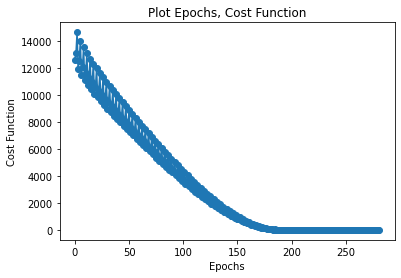

In [10]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

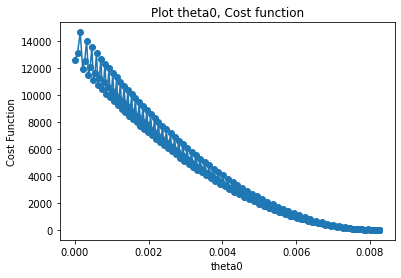

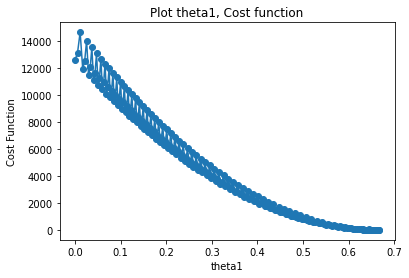

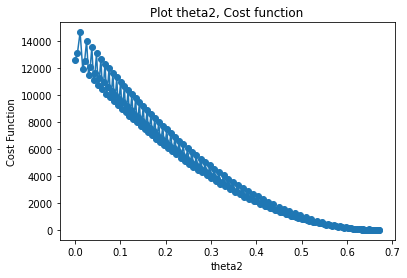

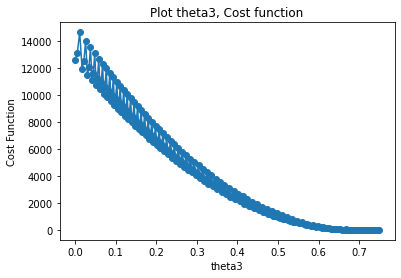

In [11]:
for i in range(X1.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [12]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.977868176840712
cost = 12.296095934933858


In [13]:
thetas , costs ,h = multiLRNminibatchAdam(X1,y_points0,5,150,0.12,10**-8,0.8,0.9,0.0001) 

(25, 3)


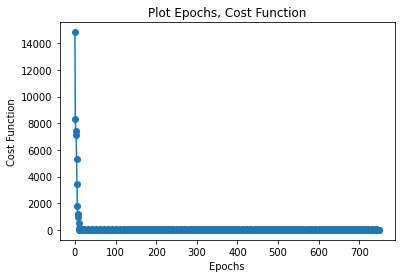

In [14]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

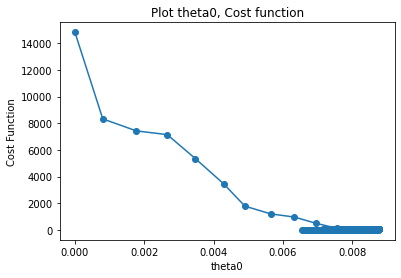

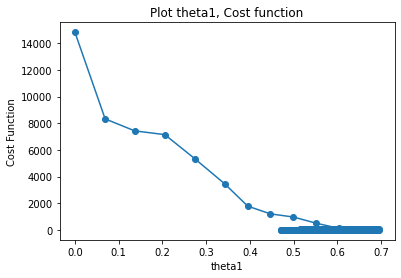

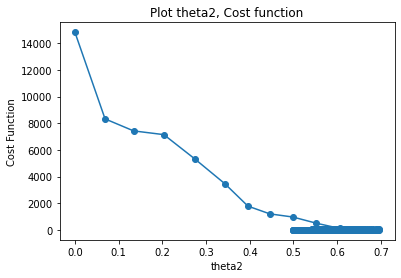

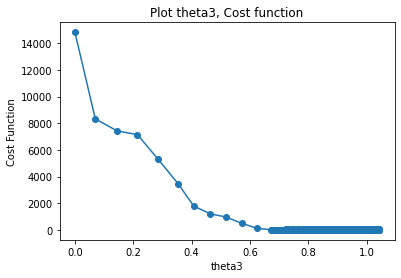

In [15]:
for i in range(X1.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [16]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.951193212994386
cost = 22.476914660978345


In [17]:
thetas , costs ,h = multiLRNminibatchAdam(X1,y_points0,16,150,0.07,10**-8,0.8,0.9,0.0001) 

(25, 3)


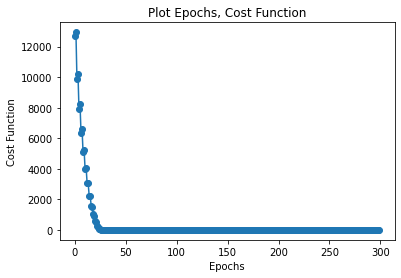

In [18]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

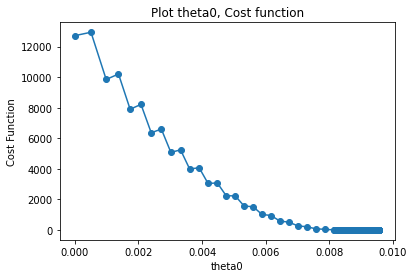

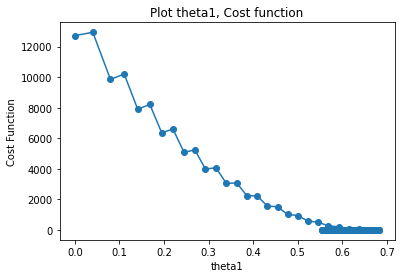

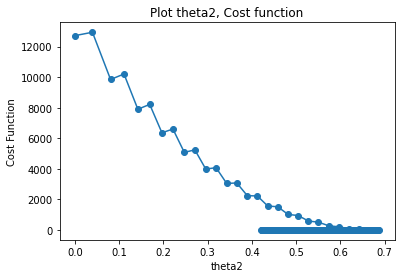

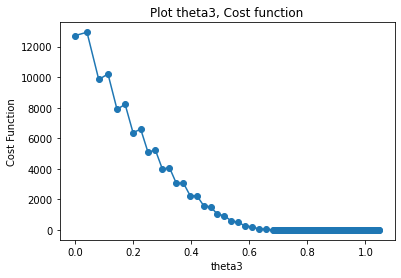

In [19]:
for i in range(X1.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [20]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9831996395803496
cost = 8.798687292969838


#### single variable


In [21]:
thetas , costs ,h = multiLRNminibatchAdam(x0,y0,5,150,0.07,10**-8,0.8,0.9,0.0001) 

(50, 1)


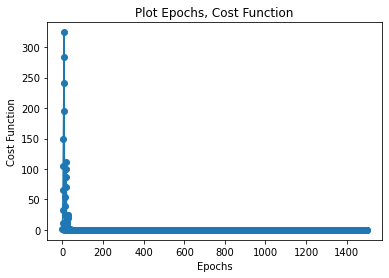

In [22]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

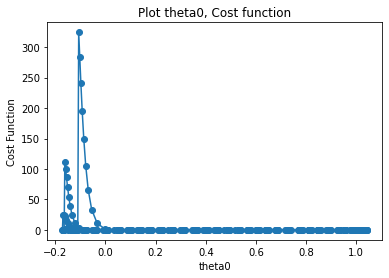

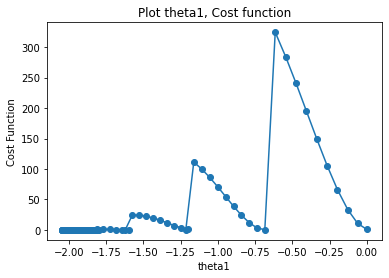

In [23]:
for i in range(len(thetas[-1])):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

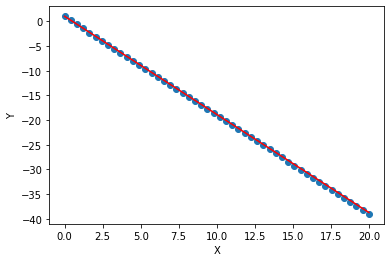

In [24]:
drawRegressionLine(x0,y0,"X","Y","",thetas[-1:,0],thetas[-1,1])

In [25]:
print("r2 =",r2_score(y0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9995195781496898
cost = 0.03740359407770789
